Imports

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data preprocessing

In [69]:
file_paths = ["dianCombData.csv", "goldCombData.csv", "ironCombData.csv"]
ranks = ["Diamond", "Gold", "Iron"]

for file_path, rank in zip(file_paths, ranks):
    data = pd.read_csv(file_path)
    filtered_data = data[data["game_duration"] > 650]
    filtered_data = filtered_data.drop(columns=["match_id", "team_id"])
    filtered_data.to_csv(f"filtered{rank}data.csv", index=False)
    print(f"Filtered and cleaned data for {rank} saved to filtered_{rank}_data.csv")


Filtered and cleaned data for Diamond saved to filtered_Diamond_data.csv
Filtered and cleaned data for Gold saved to filtered_Gold_data.csv
Filtered and cleaned data for Iron saved to filtered_Iron_data.csv


In [70]:
diamond_data = pd.read_csv("filteredDiamonddata.csv")
gold_data = pd.read_csv("filteredGolddata.csv")
iron_data = pd.read_csv("filteredIrondata.csv")

datasets = [diamond_data, gold_data, iron_data]

ranks = ["Diamond", "Gold", "Iron"]

metrics = ["gold15", "damage_done15", "kills15", "cs15"]


PLotting!

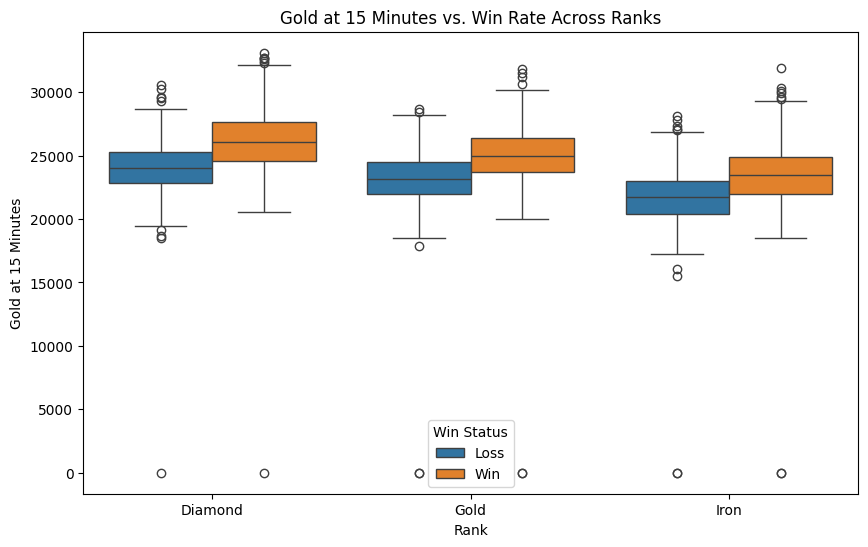

In [71]:
tdiamond_data = diamond_data
tgold_data = gold_data
tiron_data = iron_data
tdiamond_data["rank"] = "Diamond"
tgold_data["rank"] = "Gold"
tiron_data["rank"] = "Iron"
combined_data = pd.concat([tdiamond_data, tgold_data, tiron_data])

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=combined_data, x="rank", y="gold15", hue="is_winner")
plt.title("Gold at 15 Minutes vs. Win Rate Across Ranks")
plt.xlabel("Rank")
plt.ylabel("Gold at 15 Minutes")
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Loss", "Win"], title="Win Status")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x="rank", y="damage_done15", hue="is_winner")
plt.title("Damage at 15 Minutes vs. Win Rate Across Ranks")
plt.xlabel("Rank")
plt.ylabel("Damage at 15")
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Loss", "Win"], title="Win Status")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x="rank", y="kills15", hue="is_winner")
plt.title("Kills at 15 Minutes vs. Win Rate Across Ranks")
plt.xlabel("Rank")
plt.ylabel("Kills at 15")
handles, labels = boxplot.get_legend_handles_labels()
plt.legend(handles=handles, labels=["Loss", "Win"], title="Win Status")
plt.show()

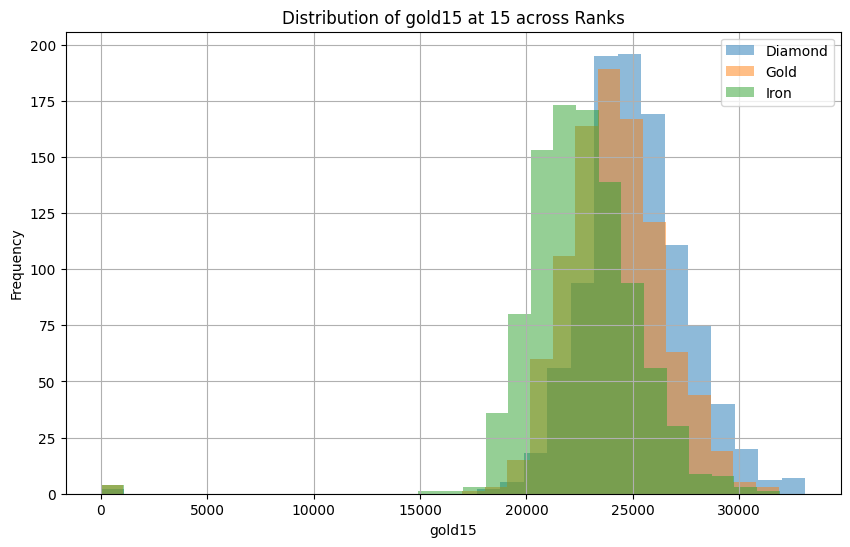

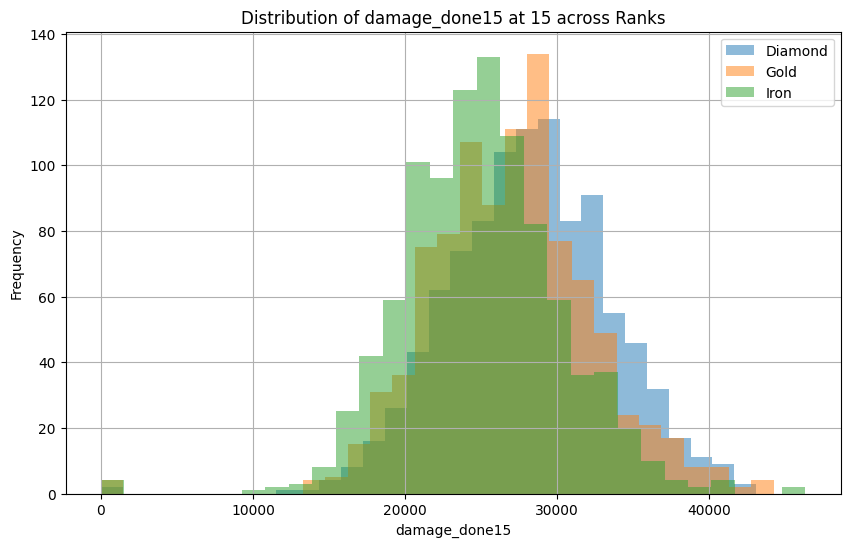

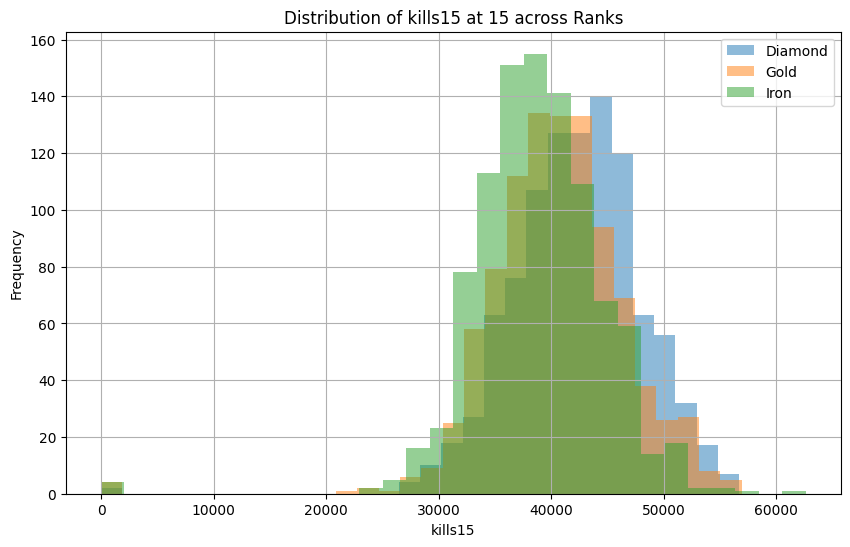

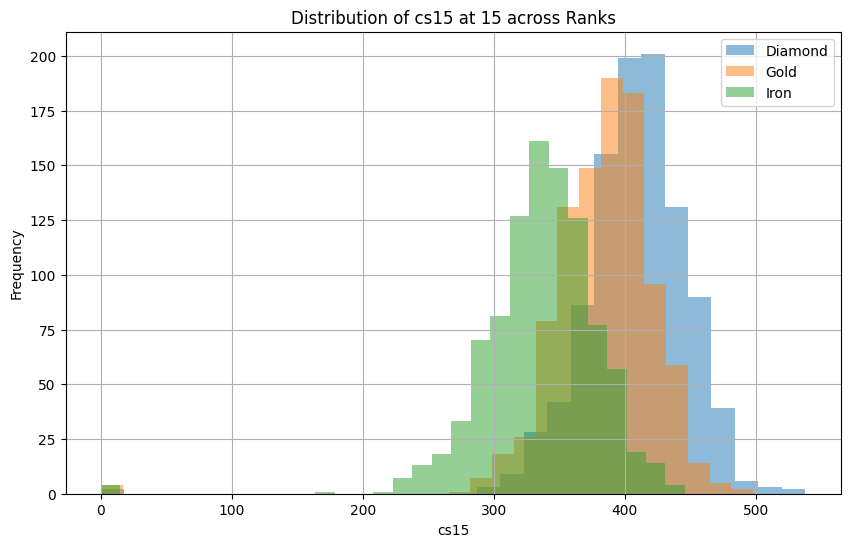

In [74]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    for data, rank in zip(datasets, ranks):
        plt.hist(data[metric], bins=30, alpha=0.5, label=rank)
    
    plt.title(f"Distribution of {metric} at 15 across Ranks")
    plt.xlabel(metric)
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()





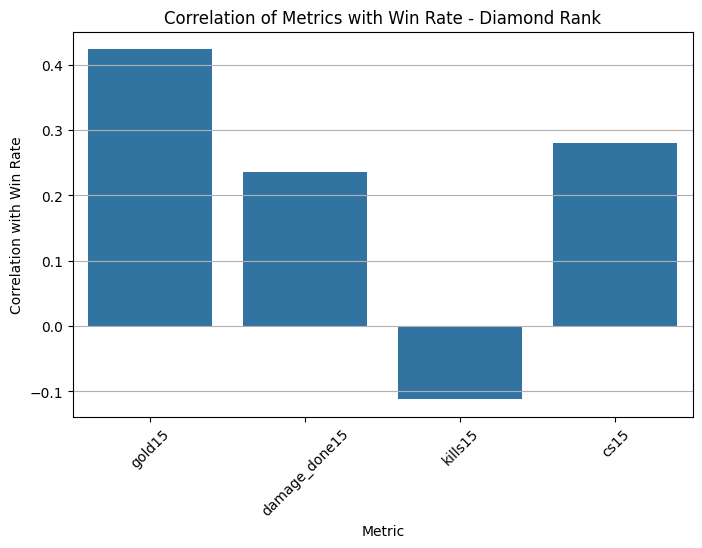

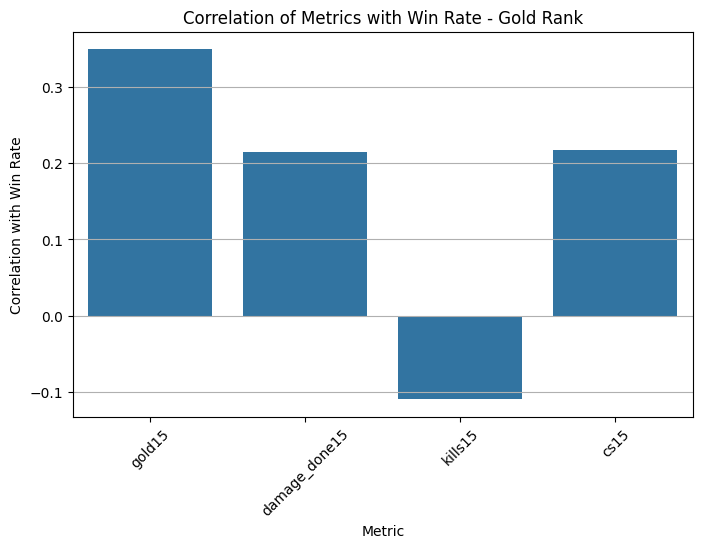

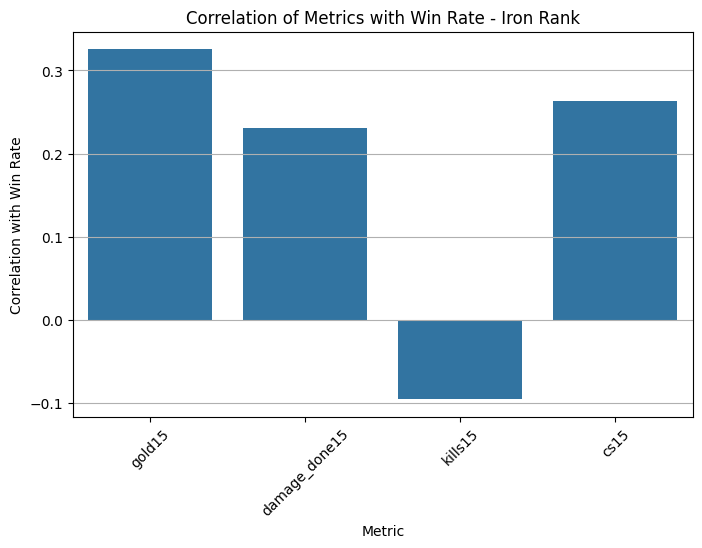

In [75]:

# Function to calculate correlation with win rates and visualize
def plot_correlation_with_win_rate(data, rank, metrics):
    correlations = data[metrics + ['is_winner']].corr()['is_winner'][:-1]
    plt.figure(figsize=(8, 5))
    sns.barplot(x=correlations.index, y=correlations.values)
    plt.title(f"Correlation of Metrics with Win Rate - {rank} Rank")
    plt.ylabel("Correlation with Win Rate")
    plt.xlabel("Metric")
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.show()

# Plot correlations for each rank
for data, rank in zip(datasets, ranks):
    plot_correlation_with_win_rate(data, rank, metrics)


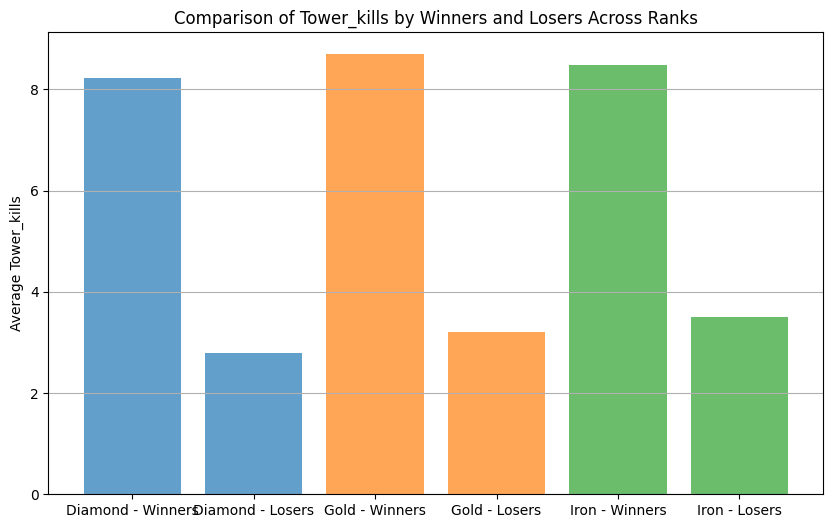

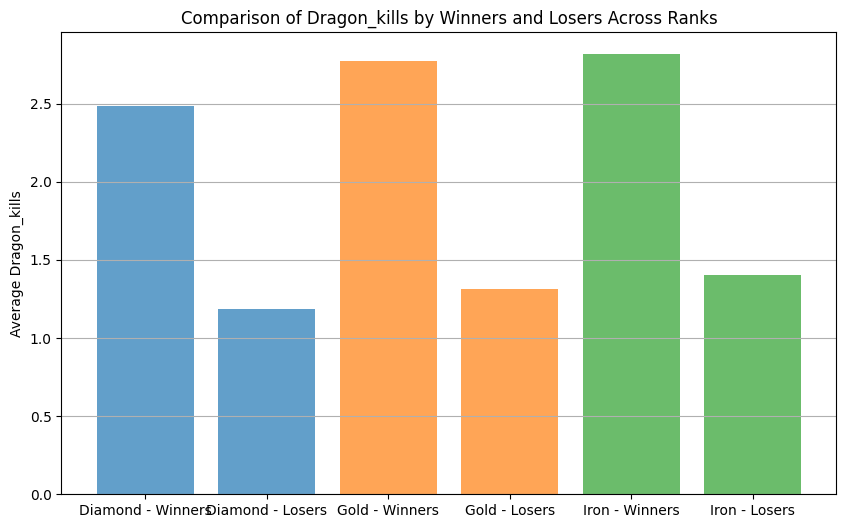

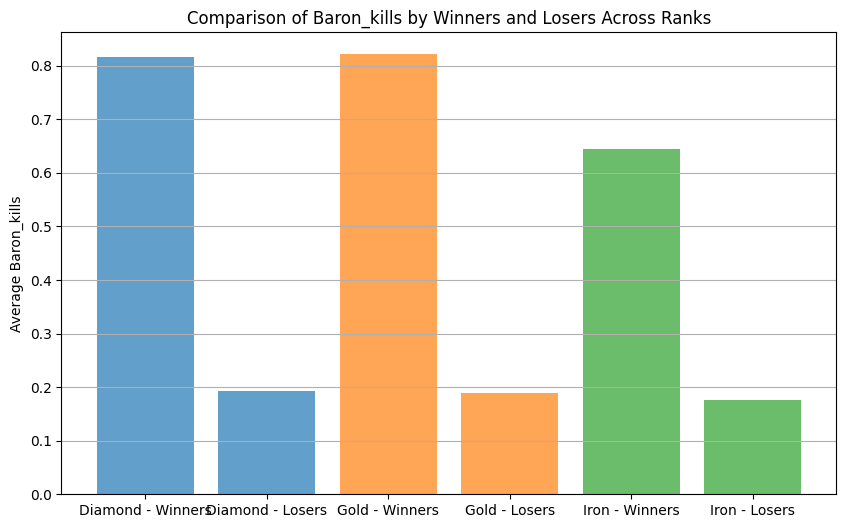

In [76]:
objective_metrics = ["tower_kills", "dragon_kills", "baron_kills"]
ranks = ["Diamond", "Gold", "Iron"]
datasets = [diamond_data, gold_data, iron_data]

# Plot the average number of objectives taken by winners and losers in each rank
for metric in objective_metrics:
    plt.figure(figsize=(10, 6))
    for data, rank in zip(datasets, ranks):
        winners = data[data['is_winner']][metric].mean()
        losers = data[~data['is_winner']][metric].mean()
        plt.bar([rank + " - Winners", rank + " - Losers"], [winners, losers], label=rank, alpha=0.7)
    
    plt.title(f"Comparison of {metric.capitalize()} by Winners and Losers Across Ranks")
    plt.ylabel(f"Average {metric.capitalize()}")
    plt.grid(True, axis='y')
    plt.show()

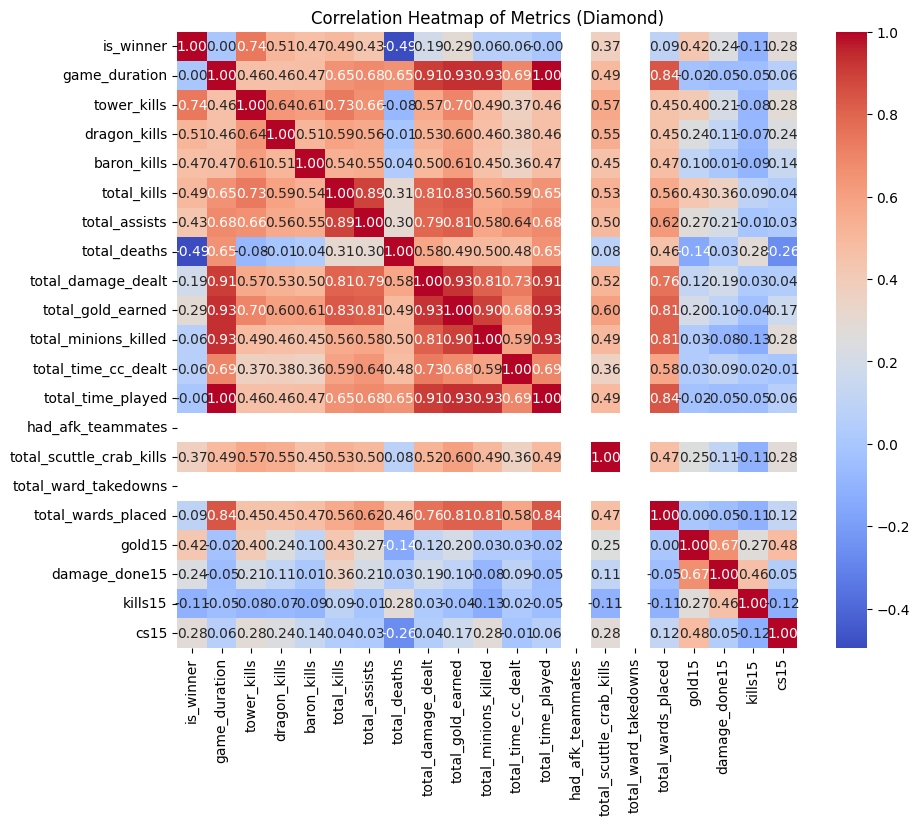

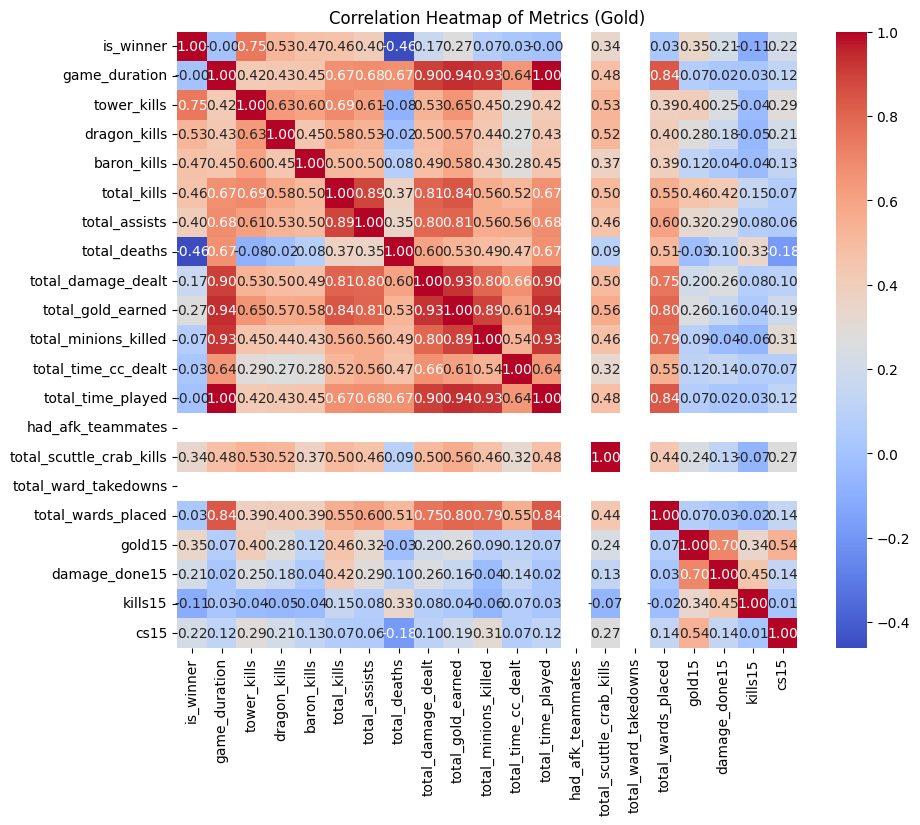

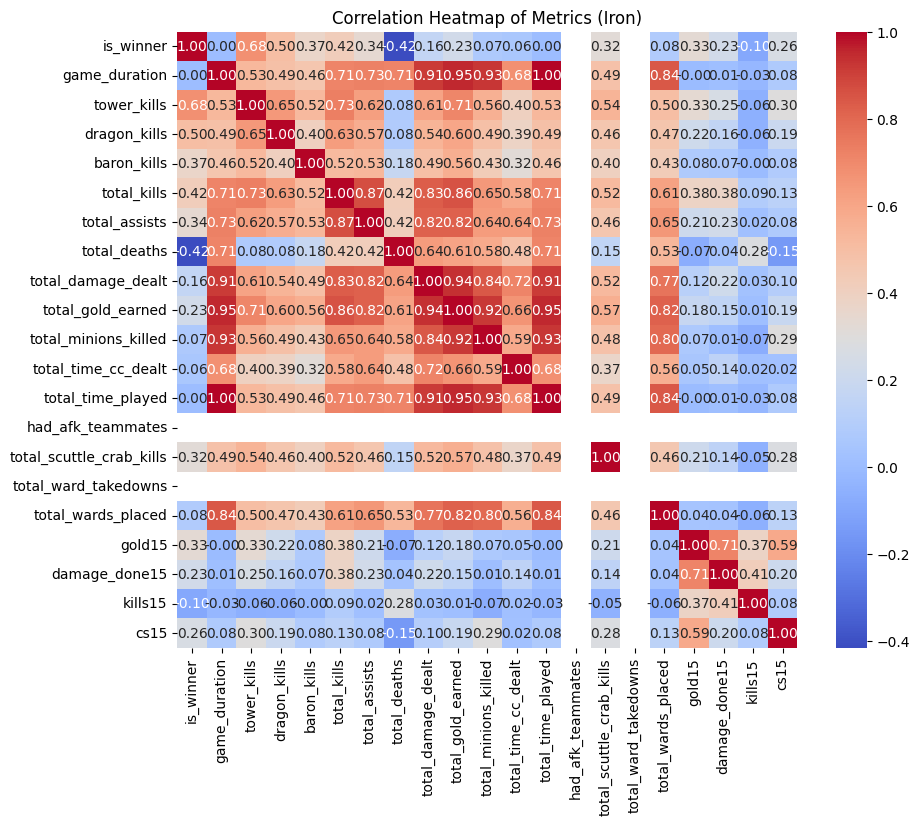

In [80]:
diamond_data = pd.read_csv("filteredDiamonddata.csv")
gold_data = pd.read_csv("filteredGolddata.csv")
iron_data = pd.read_csv("filteredIrondata.csv")

iron_corr = iron_data.corr()
gold_corr = gold_data.corr()
diamond_corr = diamond_data.corr()

# Create a heatmap for one rank (e.g., Diamond)
plt.figure(figsize=(10, 8))
sns.heatmap(diamond_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Metrics (Diamond)")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(gold_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Metrics (Gold)")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(iron_corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Metrics (Iron)")
plt.show()

C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,
C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,
C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,


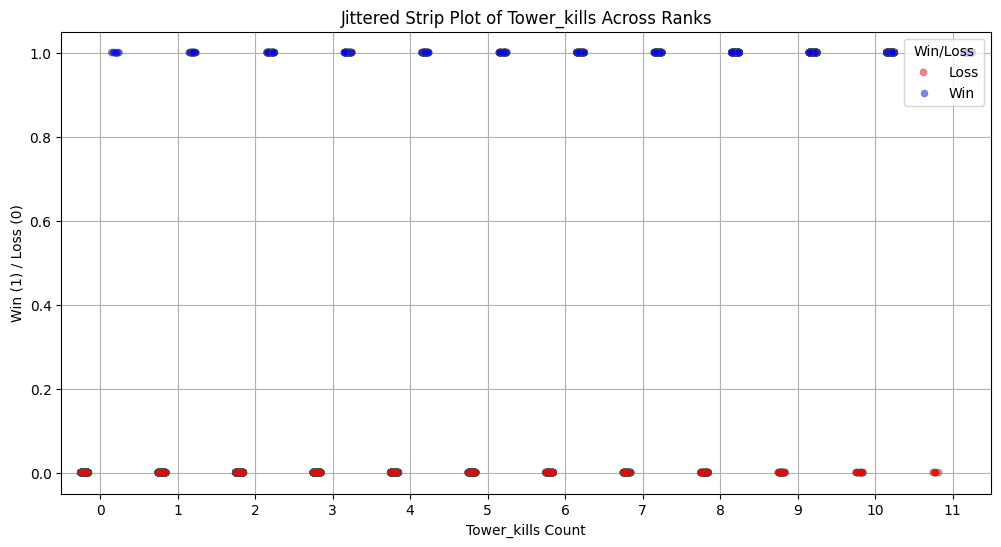

C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,
C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,
C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,


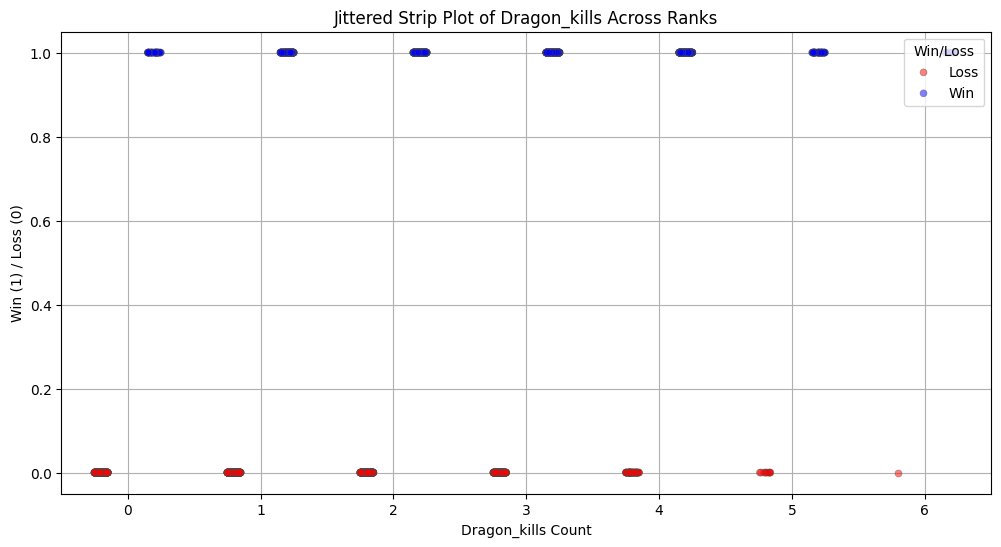

C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,
C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,
C:\Users\zizen\AppData\Local\Temp\ipykernel_44176\2797123305.py:6: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True,


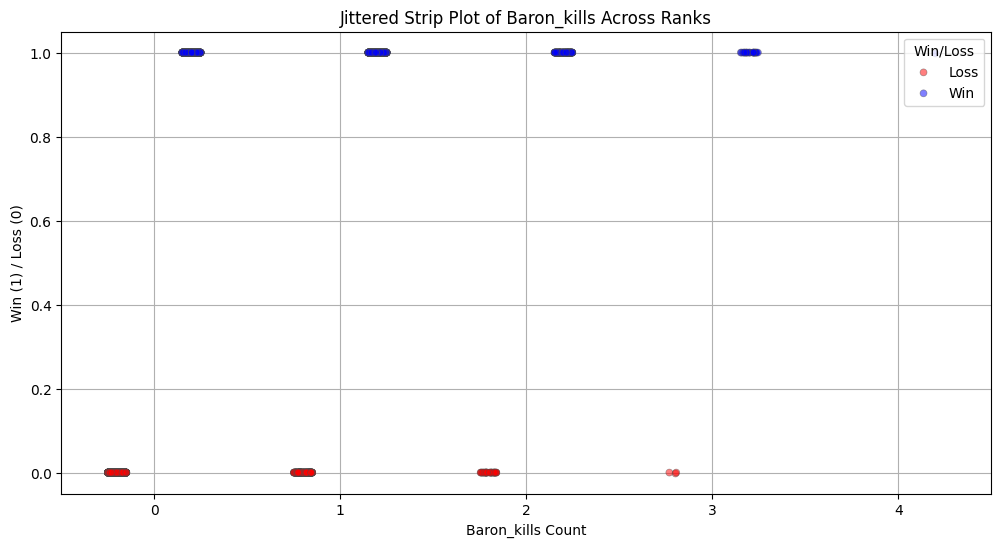

In [ ]:
for metric in objective_metrics:
    plt.figure(figsize=(12, 6))
    for data, rank in zip(datasets, ranks):
        sns.stripplot(data=data, x=metric, y="is_winner", jitter=True, alpha=0.5, dodge=True, 
                      hue="is_winner", palette={1: "blue", 0: "red"}, 
                      edgecolor="gray", size=5, linewidth=0.5)
    
    plt.title(f"Jittered Strip Plot of {metric.capitalize()} Across Ranks")
    plt.xlabel(f"{metric.capitalize()} Count")
    plt.ylabel("Win (1) / Loss (0)")
    plt.legend(title="Win/Loss", loc="upper right", labels=["Loss", "Win"])
    plt.grid(True)
    plt.show()
